# Gender Recognition by Voice

## Importing Data

In [324]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [325]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,-4.049248,-4.224901,-2.576102,-5.693607,-0.214778,0.427355,2.925892,3.177486,-0.039083,0.471575,-2.141210,-1.812038,-1.384486,0.636793,-1.454772,-1.564205,-0.708404,-1.431422,-1.419137,male
1,-3.841053,-3.999293,-2.486885,-5.588987,-0.258485,0.611669,4.032721,4.022523,-0.065236,0.594431,-2.141210,-1.079594,-1.369352,-0.524133,-1.014103,-1.561916,-0.708404,-1.418107,-1.405818,male
2,-3.463066,-4.095851,-2.706986,-3.928699,0.909326,1.603848,4.675089,4.506253,-1.083730,0.398261,-2.141210,-1.365368,-1.390131,0.404082,-1.065344,-1.563866,-0.708404,-1.429203,-1.416917,male
3,-0.992157,-0.759454,-0.901418,-0.711205,0.632690,0.899998,-0.927599,-0.837709,1.516383,1.797340,-1.054576,-1.666966,-1.143909,-0.524133,0.614286,-1.195367,-0.708404,-1.273867,-1.261532,male
4,-1.530640,-1.676948,-1.268395,-0.792029,1.005588,1.322561,-1.055855,-0.807635,1.708336,2.114740,-0.790514,-1.127233,-1.239725,0.189238,0.289046,-0.221660,-0.708404,0.124154,0.136933,male


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Baseline Model: Classification Tree

In the lecture, we have seen that a classification tree is a good model to start with. We will use the same model here.

We try to use a classification tree with depth 4.

### Training the Model

We will use the `DecisionTreeClassifier` from `sklearn.tree` to train a classification tree. We will use the default parameters for now.


In [327]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluating the Model

Firstly, we will use the `score` method to see the accuracy of the model on the training set.

In [328]:
classification_tree_train_accuracy = tree.score(X_train, y_train)
print("Training set accuracy: {:.2f}".format(classification_tree_train_accuracy))

Training set accuracy: 1.00


Then we will use the `score` method to see the accuracy of the model on the test set.

In [329]:
classification_tree_test_accuracy = tree.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(classification_tree_test_accuracy))

Test set accuracy: 0.96


We try to see the confusion matrix of the model.

<Axes: >

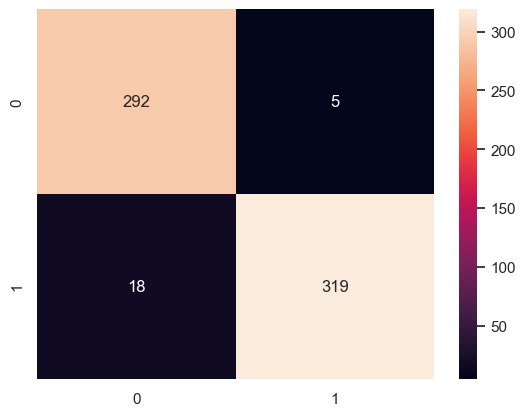

In [330]:
from sklearn.metrics import confusion_matrix

y_prediction = tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [331]:
TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.2f}".format(TPR))
print("True Negative Rate: {:.2f}".format(TNR))
print("False Positive Rate: {:.2f}".format(FPR))
print("False Negative Rate: {:.2f}".format(FNR))

True Positive Rate: 0.95
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.05


### Visualizing and Analyzing the Model

Then we try to draw the tree using `sklearn.tree.plot_tree`.

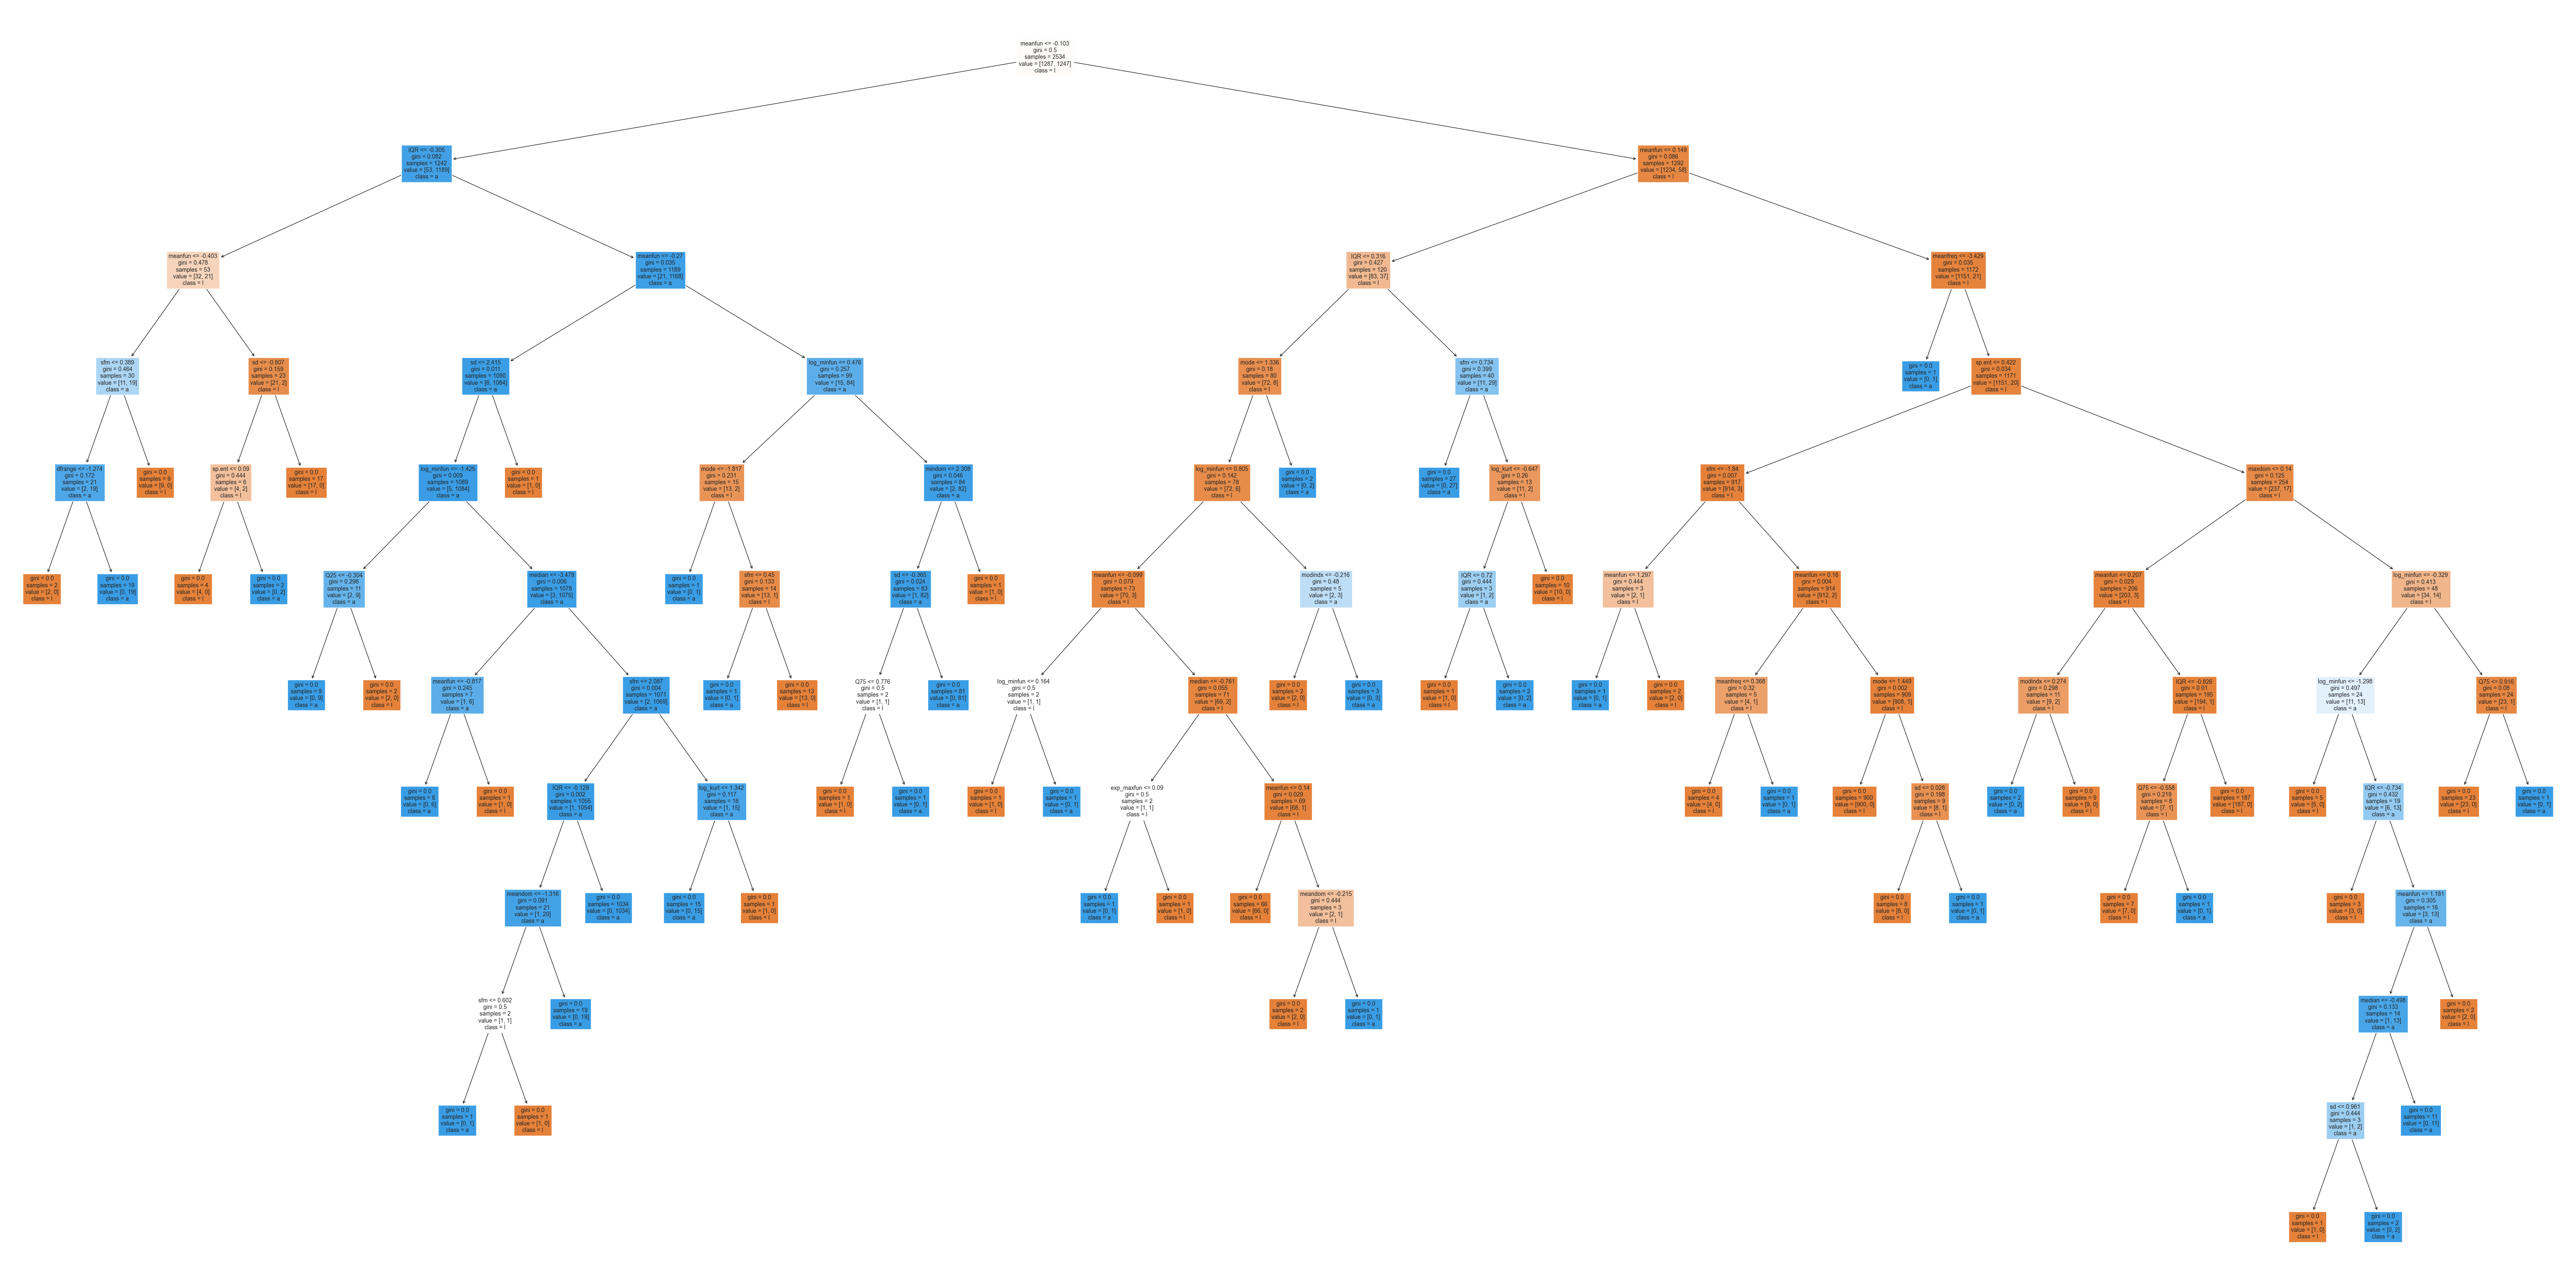

In [332]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 40))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

From the tree, we can see that the most important feature is `meanfun`. The second most important feature is `IQR`.

Then, we try to plot the data with the two most important features.

<Axes: xlabel='meanfun', ylabel='IQR'>

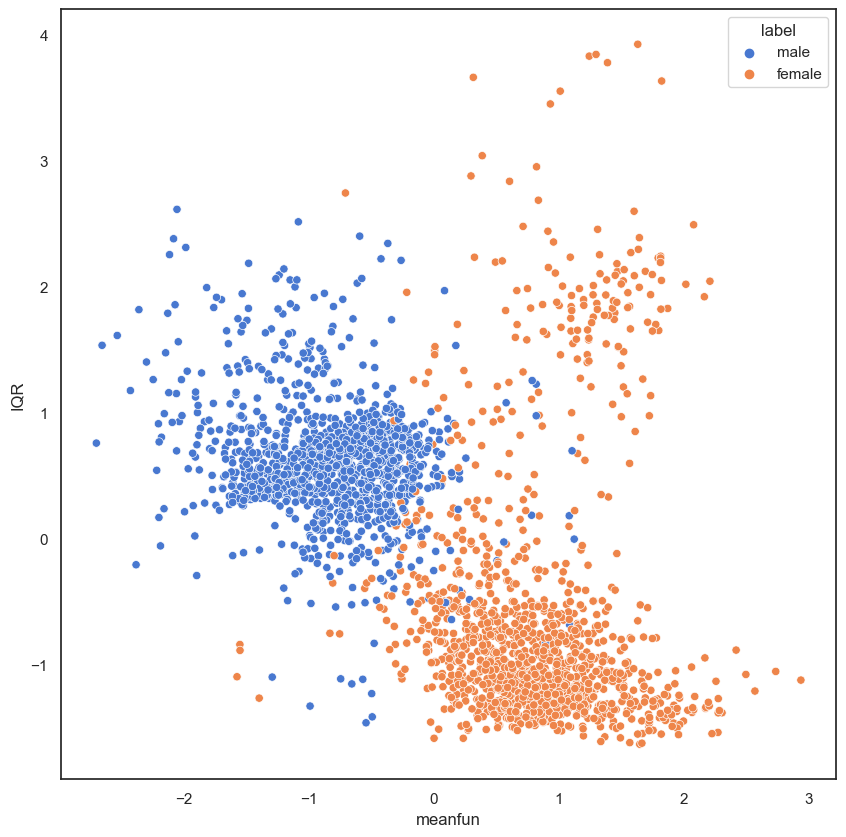

In [333]:
X_train_important = X_train[["meanfun", "IQR"]]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_train_important, x="meanfun", y="IQR", hue=y_train["label"])

## Extracting Important Features

In order to explore more models, we will firstly use the two most important features only. Which makes the model simpler and easier to interpret.

In [334]:
X_train_important = X_train[["meanfun", "IQR"]]
X_test_important = X_test[["meanfun", "IQR"]]

### Logistic Regression

In logistic regression, we try to use regression to predict the probability of the label, which is $p(y=\mathtt{male}\mid X=X_i)$.

We use the sigmoid function to transform the probability to a value between 0 and 1, which is:
$$
\hat{p} = \frac{1}{1 + e^{-\sum_{i=1}^n \beta_i x_i}}
$$

Firstly, for ease of interpretation, we will use only one feature, which is `meanfun`.

beta_0: -0.26
beta_1: -5.54
Training set accuracy: 0.96
Test set accuracy: 0.95
True Positive Rate: 0.95
True Negative Rate: 0.95
False Positive Rate: 0.05
False Negative Rate: 0.05
Training set accuracy: 0.96
Test set accuracy: 0.95


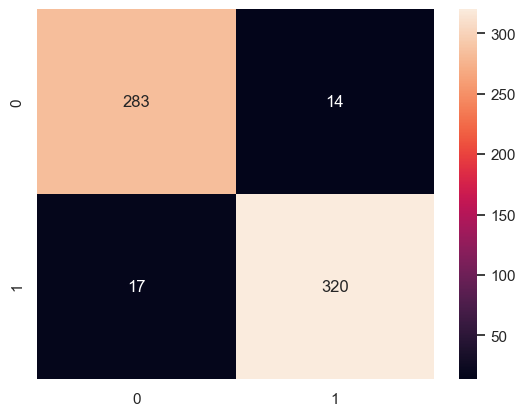

In [335]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87).fit(X_train_important[["meanfun"]], y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important[["meanfun"]], y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_important[["meanfun"]], y_test)))
sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])).ravel()
TPR_logreg_1 = TP / (TP + FN)
TNR_logreg_1 = TN / (TN + FP)
FPR_logreg_1 = FP / (FP + TN)
FNR_logreg_1 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_1))
print("True Negative Rate: {:.2f}".format(TNR_logreg_1))
print("False Positive Rate: {:.2f}".format(FPR_logreg_1))
print("False Negative Rate: {:.2f}".format(FNR_logreg_1))

logreg_1_train_accuracy = logreg.score(X_train_important[["meanfun"]], y_train.squeeze())
logreg_1_test_accuracy = logreg.score(X_test_important[["meanfun"]], y_test.squeeze())

print("Training set accuracy: {:.2f}".format(logreg_1_train_accuracy))
print("Test set accuracy: {:.2f}".format(logreg_1_test_accuracy))

We try to plot the regression line of the model.

<Axes: xlabel='meanfun', ylabel='label'>

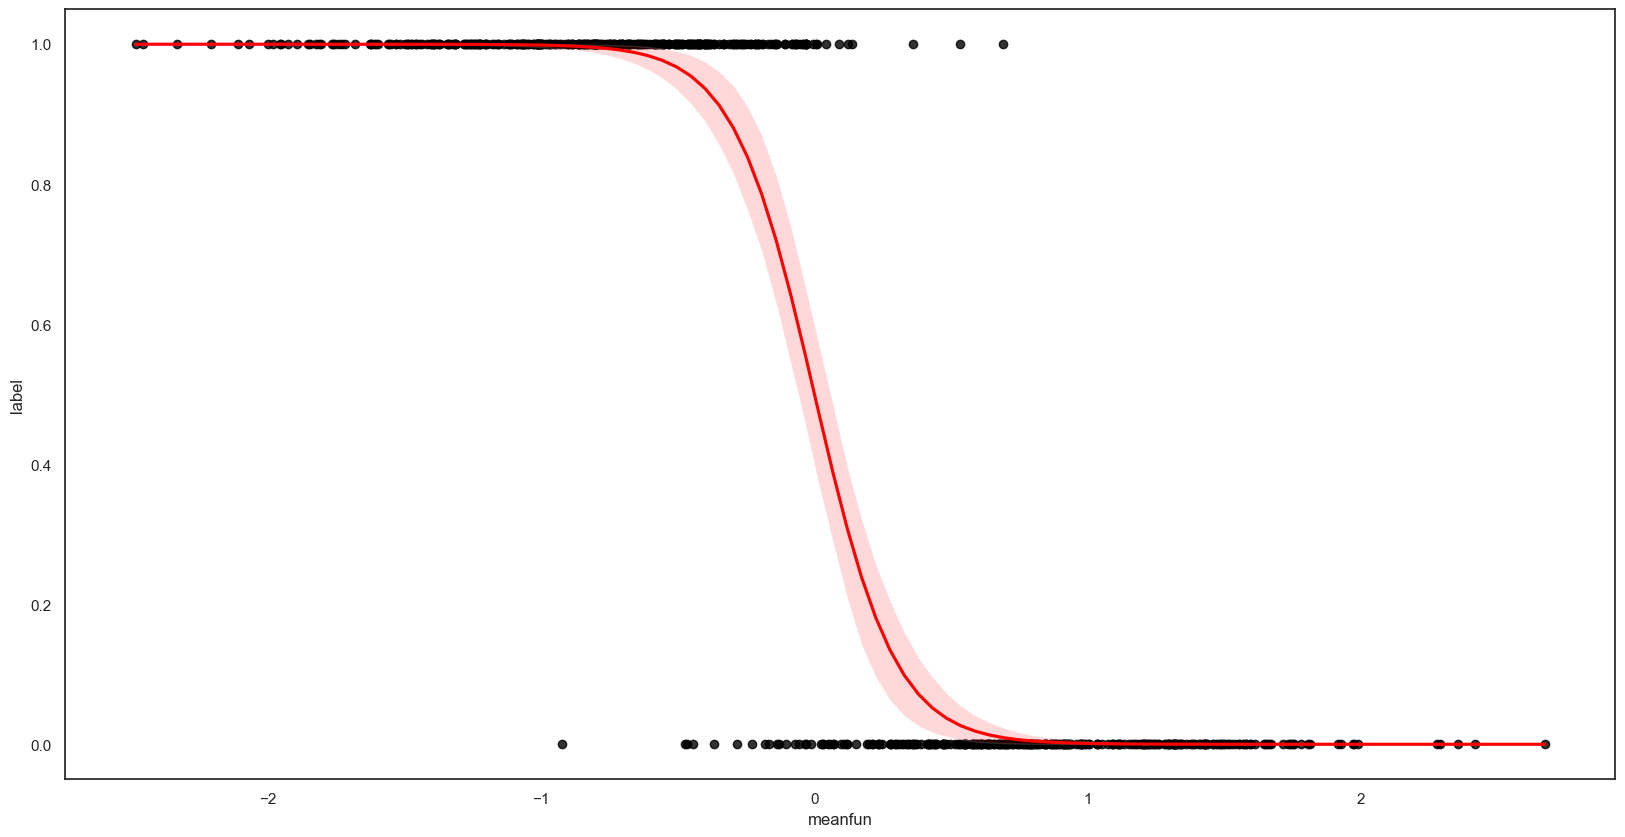

In [336]:
x_plot = X_test_important[["meanfun"]]
y_plot = y_test["label"] == "male"
plt.figure(figsize=(20, 10))
sns.regplot(x=x_plot, y=y_plot, logistic=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})

We try to use the two most important features.

beta_0: -0.42
beta_1: -4.98
beta_2: 1.43
Training set accuracy: 0.96
True Positive Rate: 0.98
True Negative Rate: 0.97
False Positive Rate: 0.03
False Negative Rate: 0.02


<Axes: >

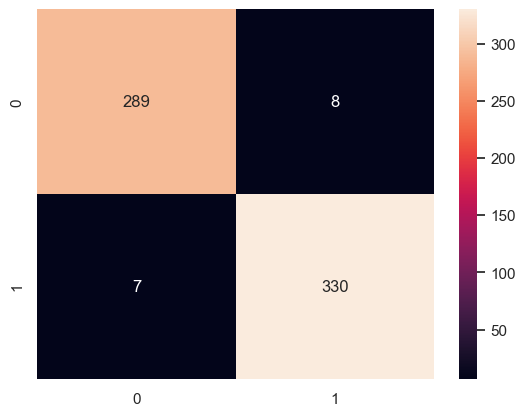

In [337]:
logreg = LogisticRegression(random_state=87).fit(X_train_important, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("beta_2: {:.2f}".format(logreg.coef_[0][1]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important, y_train.squeeze())))

logreg_2_train_accuracy = logreg.score(X_train_important, y_train.squeeze())
logreg_2_test_accuracy = logreg.score(X_test_important, y_test.squeeze())

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important)).ravel()
TPR_logreg_2 = TP / (TP + FN)
TNR_logreg_2 = TN / (TN + FP)
FPR_logreg_2 = FP / (FP + TN)
FNR_logreg_2 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_2))
print("True Negative Rate: {:.2f}".format(TNR_logreg_2))
print("False Positive Rate: {:.2f}".format(FPR_logreg_2))
print("False Negative Rate: {:.2f}".format(FNR_logreg_2))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important)), annot=True, fmt="d")

We try to plot the probability of the label for the model.

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='meanfun', ylabel='IQR'>

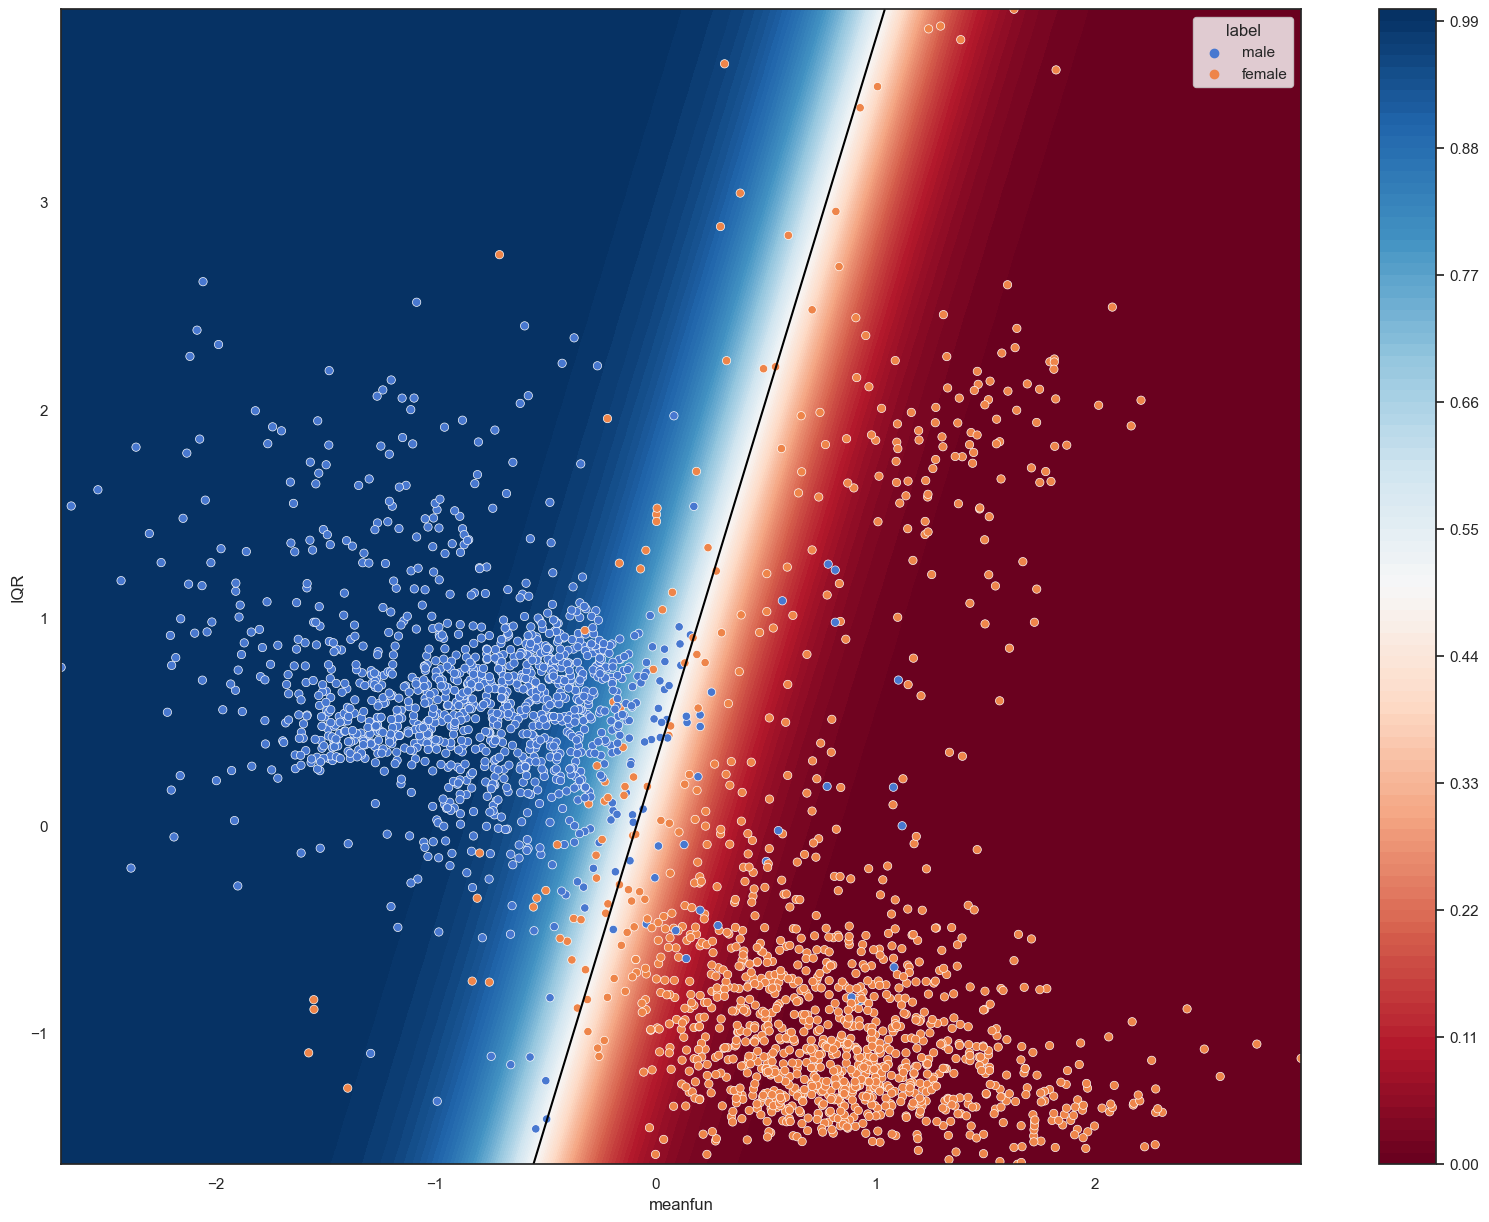

In [338]:
plt.figure(figsize=(20, 15))
x_plot = np.linspace(X_train_important["meanfun"].min(), X_train_important["meanfun"].max(), 100)
y_plot = np.linspace(X_train_important["IQR"].min(), X_train_important["IQR"].max(), 100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = logreg.predict_proba(pd.DataFrame(np.array([X_plot.ravel(), Y_plot.ravel()]).T))[:, 1].reshape(X_plot.shape)
plt.contour(X_plot, Y_plot, Z_plot, levels=[0.5], colors="black")
plt.contourf(X_plot, Y_plot, Z_plot, levels=100, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
sns.scatterplot(X_train_important, x="meanfun", y="IQR", hue=y_train["label"], sizes=(20, 200))

Then we try to use all the features.

In [339]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
for i, beta in enumerate(logreg.coef_[0]):
    print("beta_{}: {:.2f}".format(i + 1, beta))

beta_0: -0.93
beta_1: -0.22
beta_2: -0.12
beta_3: -0.68
beta_4: 0.58
beta_5: 1.10
beta_6: 0.38
beta_7: 0.51
beta_8: -0.90
beta_9: 1.40
beta_10: -1.51
beta_11: 0.14
beta_12: -4.82
beta_13: 0.73
beta_14: 0.05
beta_15: -0.23
beta_16: -0.07
beta_17: 0.02
beta_18: -0.04
beta_19: -0.04


Training set accuracy: 0.97
Test set accuracy: 0.98
True Positive Rate: 0.97
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.03


<Axes: >

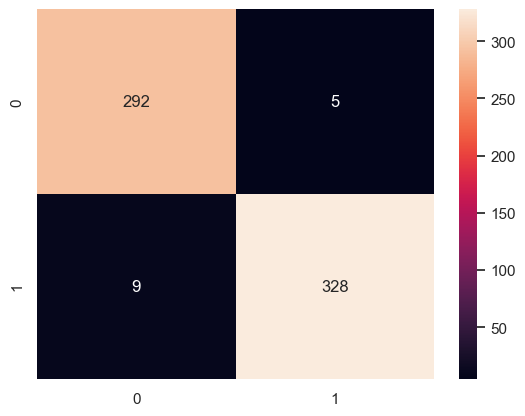

In [340]:
logreg_3_train_accuracy = logreg.score(X_train, y_train)
logreg_3_test_accuracy = logreg.score(X_test, y_test)

print("Training set accuracy: {:.2f}".format(logreg.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test)).ravel()
TPR_logreg_3 = TP / (TP + FN)
TNR_logreg_3 = TN / (TN + FP)
FPR_logreg_3 = FP / (FP + TN)
FNR_logreg_3 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_3))
print("True Negative Rate: {:.2f}".format(TNR_logreg_3))
print("False Positive Rate: {:.2f}".format(FPR_logreg_3))
print("False Negative Rate: {:.2f}".format(FNR_logreg_3))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt="d")

We try to summarize the performance of the logistic regression model.

In [341]:
pd.DataFrame(
    {
        "Model": ["Logistic Regression with 1 feature", "Logistic Regression with 2 features", "Logistic Regression with all features"],
        "Training Accuracy": [logreg_1_train_accuracy, logreg_2_train_accuracy, logreg_3_train_accuracy],
        "Test Accuracy": [logreg_1_test_accuracy, logreg_2_test_accuracy, logreg_3_test_accuracy],
    }
)

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression with 1 feature,0.955012,0.951104
1,Logistic Regression with 2 features,0.963694,0.976341
2,Logistic Regression with all features,0.973954,0.977918


## Random Forest

In [342]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=87).fit(X_train, y_train.squeeze())

In [343]:
rf.score(X_train, y_train)

1.0

In [344]:
rf.score(X_test, y_test)

0.9842271293375394

# Support Vector Machines

In [345]:
from sklearn.svm import SVC

svm = SVC(random_state=87, kernel="poly").fit(X_train_important, y_train.squeeze())

In [346]:
svm.score(X_train_important, y_train)

0.9411996842936069

In [347]:
svm.score(X_test[["meanfun", "IQR"]], y_test)

0.9605678233438486

In [348]:
y_prediction = svm.predict(X_test[["meanfun", "IQR"]])

<Axes: >

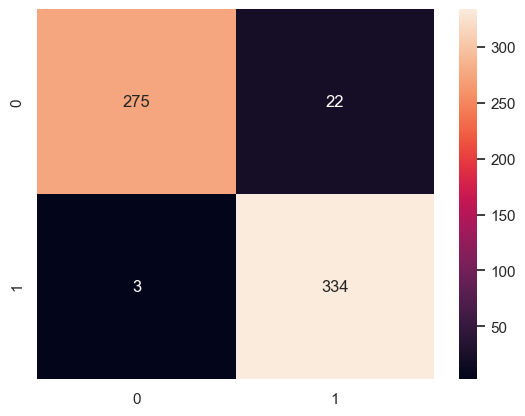

In [349]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

<Axes: xlabel='meanfun', ylabel='IQR'>

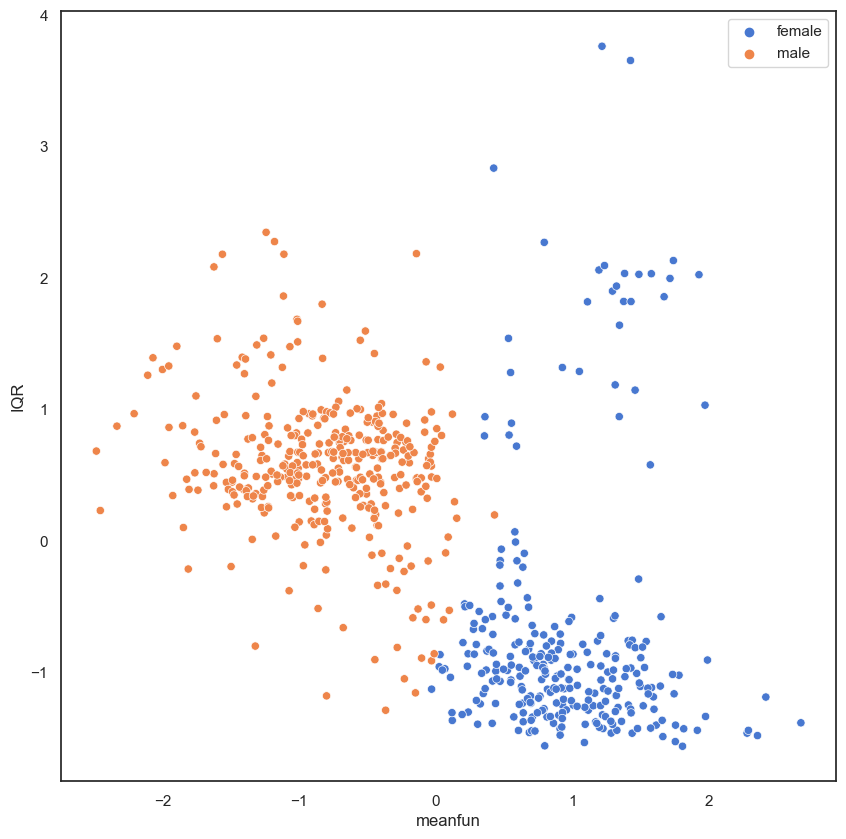

In [350]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_test, x="meanfun", y="IQR", hue=y_prediction)

Use all features

In [351]:
svm2 = SVC(kernel="poly", random_state=87).fit(X_train, y_train.squeeze())

In [352]:
svm2.score(X_train, y_train)

0.9775059194948698

In [353]:
svm2.score(X_test, y_test)

0.9763406940063092

In [354]:
y_prediction = svm2.predict(X_test)

<Axes: >

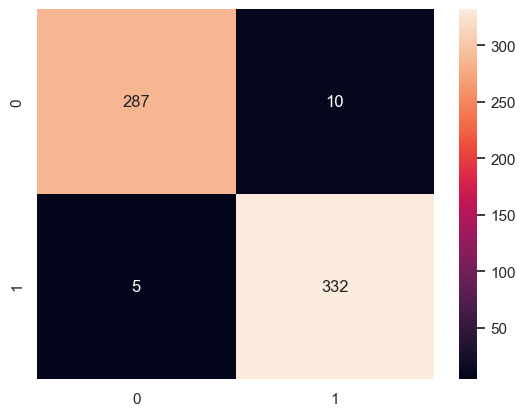

In [355]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

<Axes: xlabel='meanfun', ylabel='IQR'>

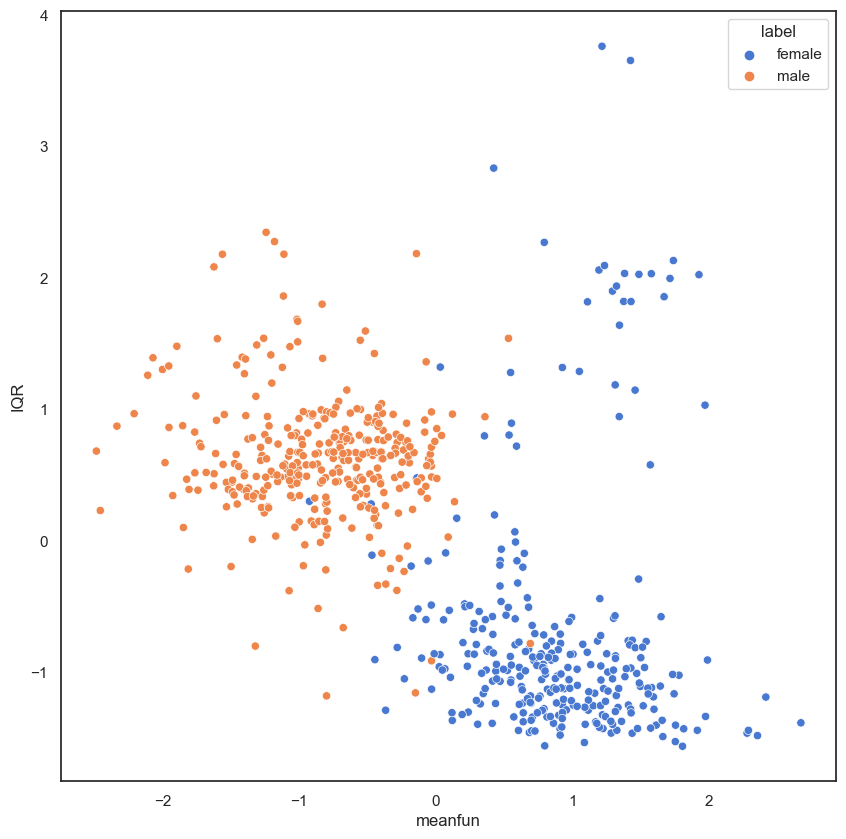

In [356]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_test, x="meanfun", y="IQR", hue=y_test["label"])

In [357]:
svm3 = SVC(random_state=87).fit(X_train, y_train.squeeze())

In [358]:
svm3.score(X_train, y_train)

0.9861878453038674

In [359]:
svm3.score(X_test, y_test)

0.9826498422712934

In [360]:
svm4 = SVC(random_state=87, kernel="sigmoid").fit(X_train, y_train.squeeze())

In [361]:
svm4.score(X_train, y_train)

0.803078137332281

In [362]:
svm4.score(X_test, y_test)

0.8201892744479495

In [363]:
svm5 = SVC(random_state=87, kernel="linear").fit(X_train, y_train.squeeze())

In [364]:
svm5.score(X_train, y_train)

0.9779005524861878

In [365]:
svm5.score(X_test, y_test)

0.9763406940063092

## K-Nearest Neighbors

In [366]:
knn.score(X_train, y_train)

0.9881610102604578

In [367]:
knn.score(X_test, y_test)

0.9794952681388013

In [368]:
y_prediction = knn.predict(X_test)

<Axes: >

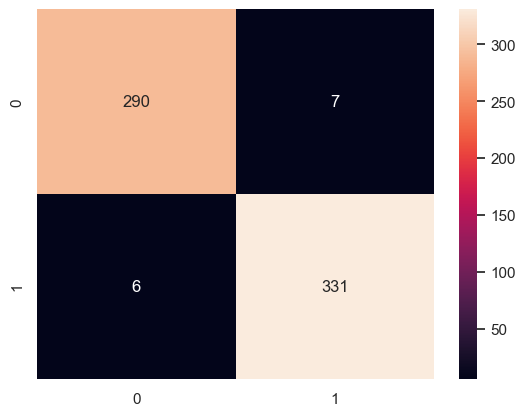

In [369]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [370]:
knn2 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.squeeze())

In [371]:
knn2.score(X_train, y_train)

0.984214680347277

In [372]:
knn2.score(X_test, y_test)

0.9794952681388013

In [373]:
y_prediction = knn2.predict(X_test)

<Axes: >

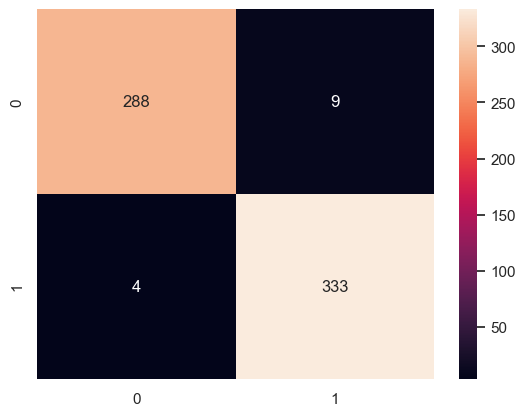

In [374]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")